In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier


In [2]:
df=pd.read_csv('dataset-3.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [4]:
df=df.drop(['fasting blood sugar','resting ecg','resting bp s'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1190 non-null   int64  
 1   sex              1190 non-null   int64  
 2   chest pain type  1190 non-null   int64  
 3   cholesterol      1190 non-null   int64  
 4   max heart rate   1190 non-null   int64  
 5   exercise angina  1190 non-null   int64  
 6   oldpeak          1190 non-null   float64
 7   ST slope         1190 non-null   int64  
 8   target           1190 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 83.8 KB


In [6]:
df.duplicated().sum()

np.int64(273)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,age,sex,chest pain type,cholesterol,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,289,172,0,0.0,1,0
1,49,0,3,180,156,0,1.0,2,1
2,37,1,2,283,98,0,0.0,1,0
3,48,0,4,214,108,1,1.5,2,1
4,54,1,3,195,122,0,0.0,1,0


In [9]:
df.describe()

,age,sex,chest pain type,cholesterol,max heart rate,exercise angina,oldpeak,ST slope,target
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.503817,0.789531,3.250818,198.813522,136.805889,0.403490,0.887786,1.635769,0.552890
std,9.435326,0.407864,0.931210,109.443018,25.474010,0.490865,1.067075,0.609555,0.497466
min,28.000000,0.000000,1.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,173.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,223.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,267.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,603.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              917 non-null    int64  
 1   sex              917 non-null    int64  
 2   chest pain type  917 non-null    int64  
 3   cholesterol      917 non-null    int64  
 4   max heart rate   917 non-null    int64  
 5   exercise angina  917 non-null    int64  
 6   oldpeak          917 non-null    float64
 7   ST slope         917 non-null    int64  
 8   target           917 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 71.6 KB


In [11]:
corr=df.corr()
corr

,age,sex,chest pain type,cholesterol,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.055385,0.165393,-0.095219,-0.382241,0.215110,0.258970,0.261430,0.281561
sex,0.055385,1.000000,0.167885,-0.200057,-0.189285,0.190161,0.105961,0.147996,0.305118
chest pain type,0.165393,0.167885,1.000000,-0.136086,-0.343888,0.416041,0.245450,0.316906,0.470940
cholesterol,-0.095219,-0.200057,-0.136086,1.000000,0.235812,-0.034038,0.050106,-0.110874,-0.232730
max heart rate,-0.382241,-0.189285,-0.343888,0.235812,1.000000,-0.370892,-0.160654,-0.341606,-0.400723
exercise angina,0.215110,0.190161,0.416041,-0.034038,-0.370892,1.000000,0.409593,0.429682,0.493707
oldpeak,0.258970,0.105961,0.245450,0.050106,-0.160654,0.409593,1.000000,0.503388,0.404514
ST slope,0.261430,0.147996,0.316906,-0.110874,-0.341606,0.429682,0.503388,1.000000,0.553227
target,0.281561,0.305118,0.470940,-0.232730,-0.400723,0.493707,0.404514,0.553227,1.000000


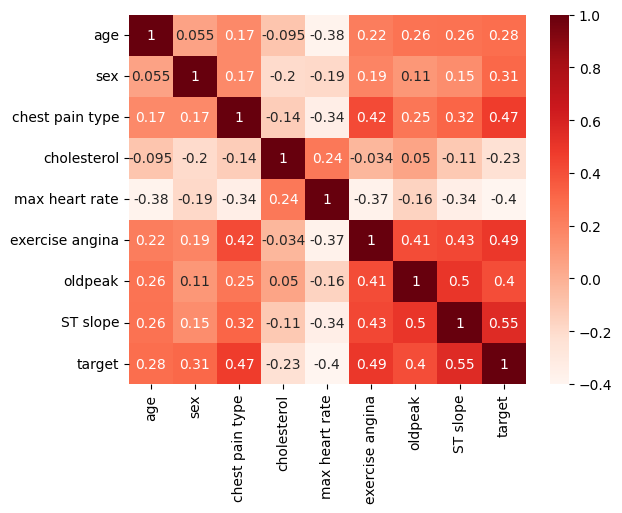

In [12]:
sns.heatmap(corr,annot=True,cmap='Reds')
plt.show()

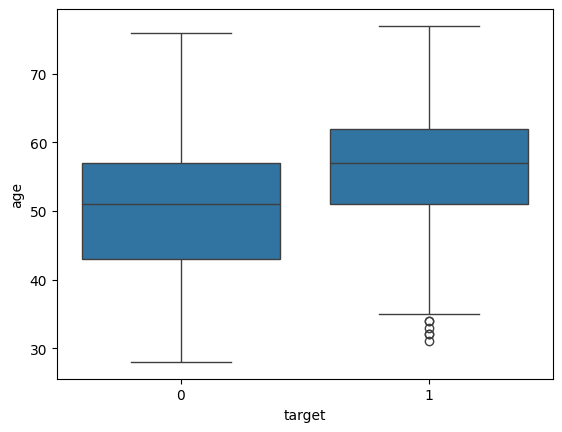

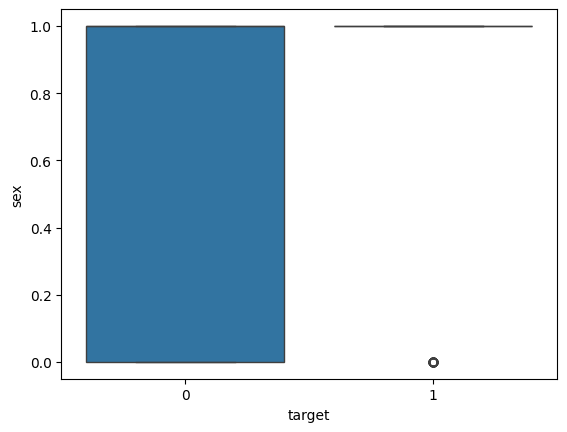

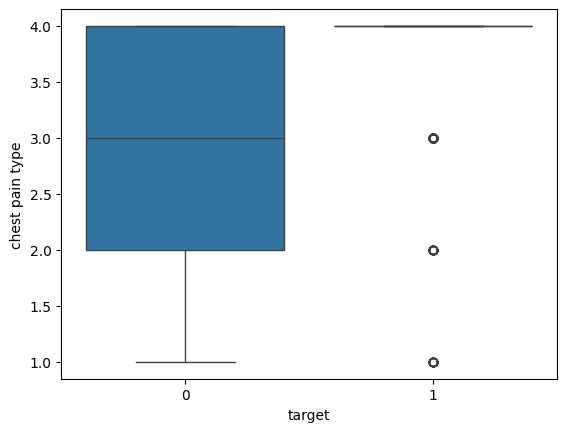

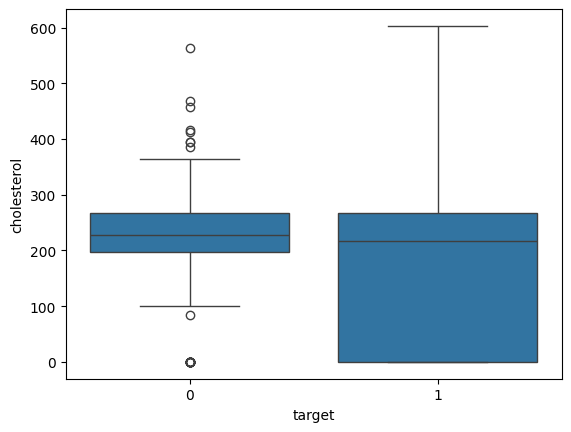

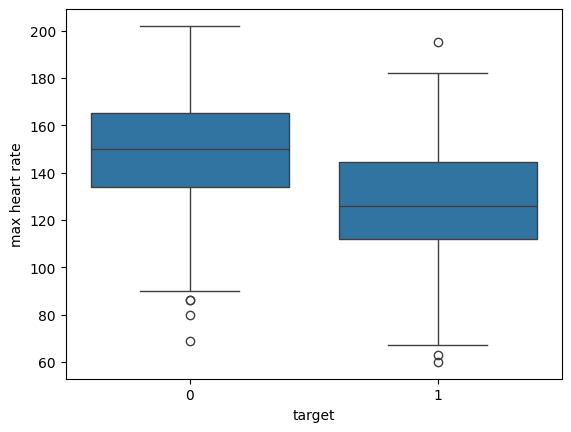

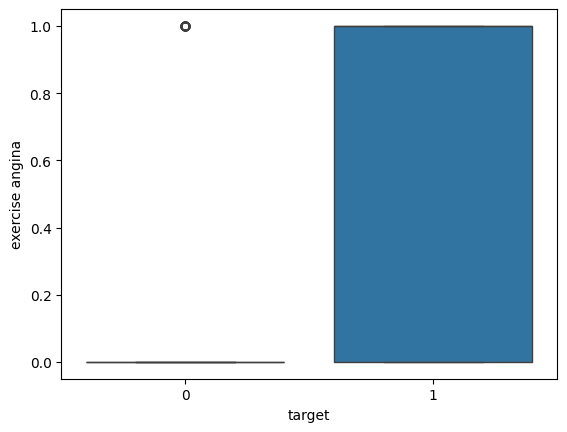

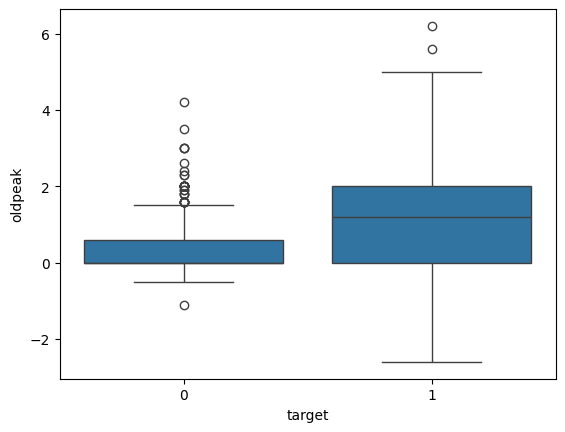

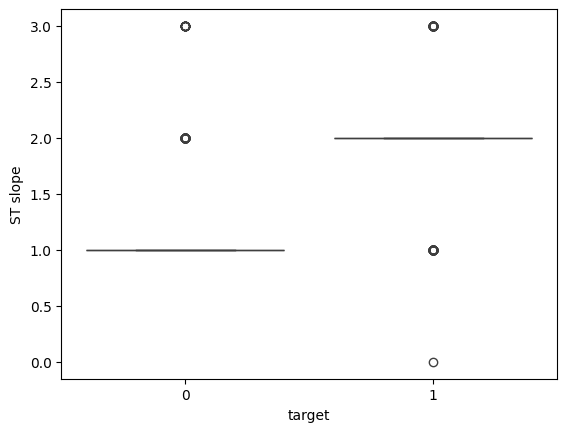

In [13]:
num_cols=['age','sex','chest pain type','cholesterol','max heart rate','exercise angina','oldpeak','ST slope']
for col in num_cols:
    sns.boxplot(x='target',y=col,data=df)
    plt.show()

In [14]:
x=df.drop(['target'],axis=1)
y=df['target']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
model=XGBClassifier(n_estimators=200,
                    max_depth=4,
                    learning_rate=0.05,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42)

In [17]:
model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [18]:
y_pred=model.predict(x_test)

In [19]:
accuracy=accuracy_score(y_test,y_pred)

In [20]:
accuracy

0.8804347826086957

In [44]:
import pickle

# assuming your trained model variable name is `model`
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as model.pkl")


Model saved as model.pkl
